In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
#load the file into dataframe
df = pd.read_excel(r"C:\Users\Sonia Bedi\Downloads\1553768847_housing.xlsx")
type(df)

pandas.core.frame.DataFrame

In [58]:
#exploratory data analysis
df.describe().round(2)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [60]:
#finding missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [66]:
#replacing null values with mean
df['total_bedrooms'].fillna(value = df['total_bedrooms'].mean() , inplace = True)

In [67]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

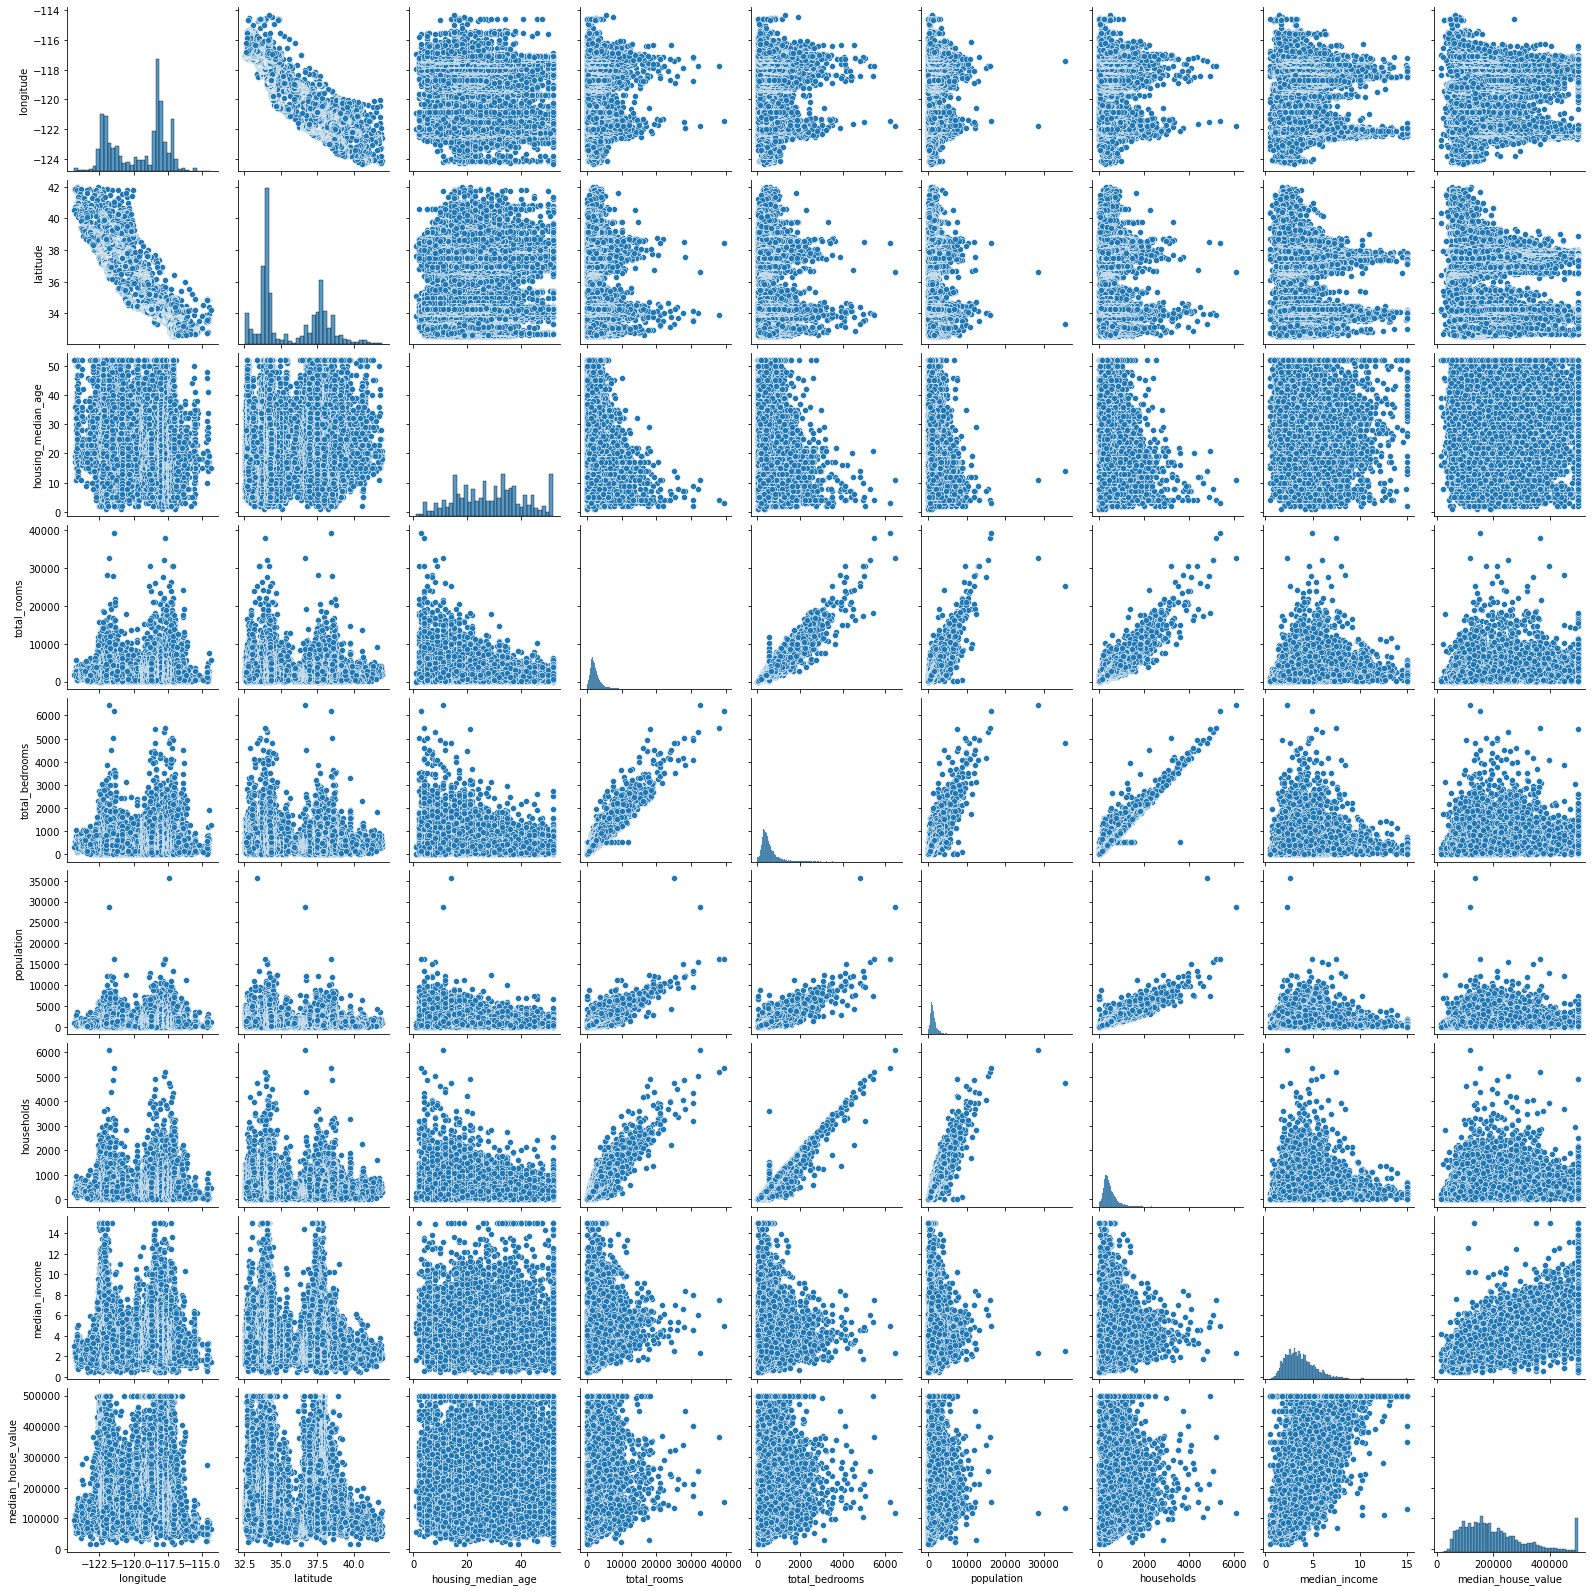

In [68]:

sns.pairplot(df)

In [69]:
df.drop(['longitude', 'latitude'], axis = 1, inplace = True)

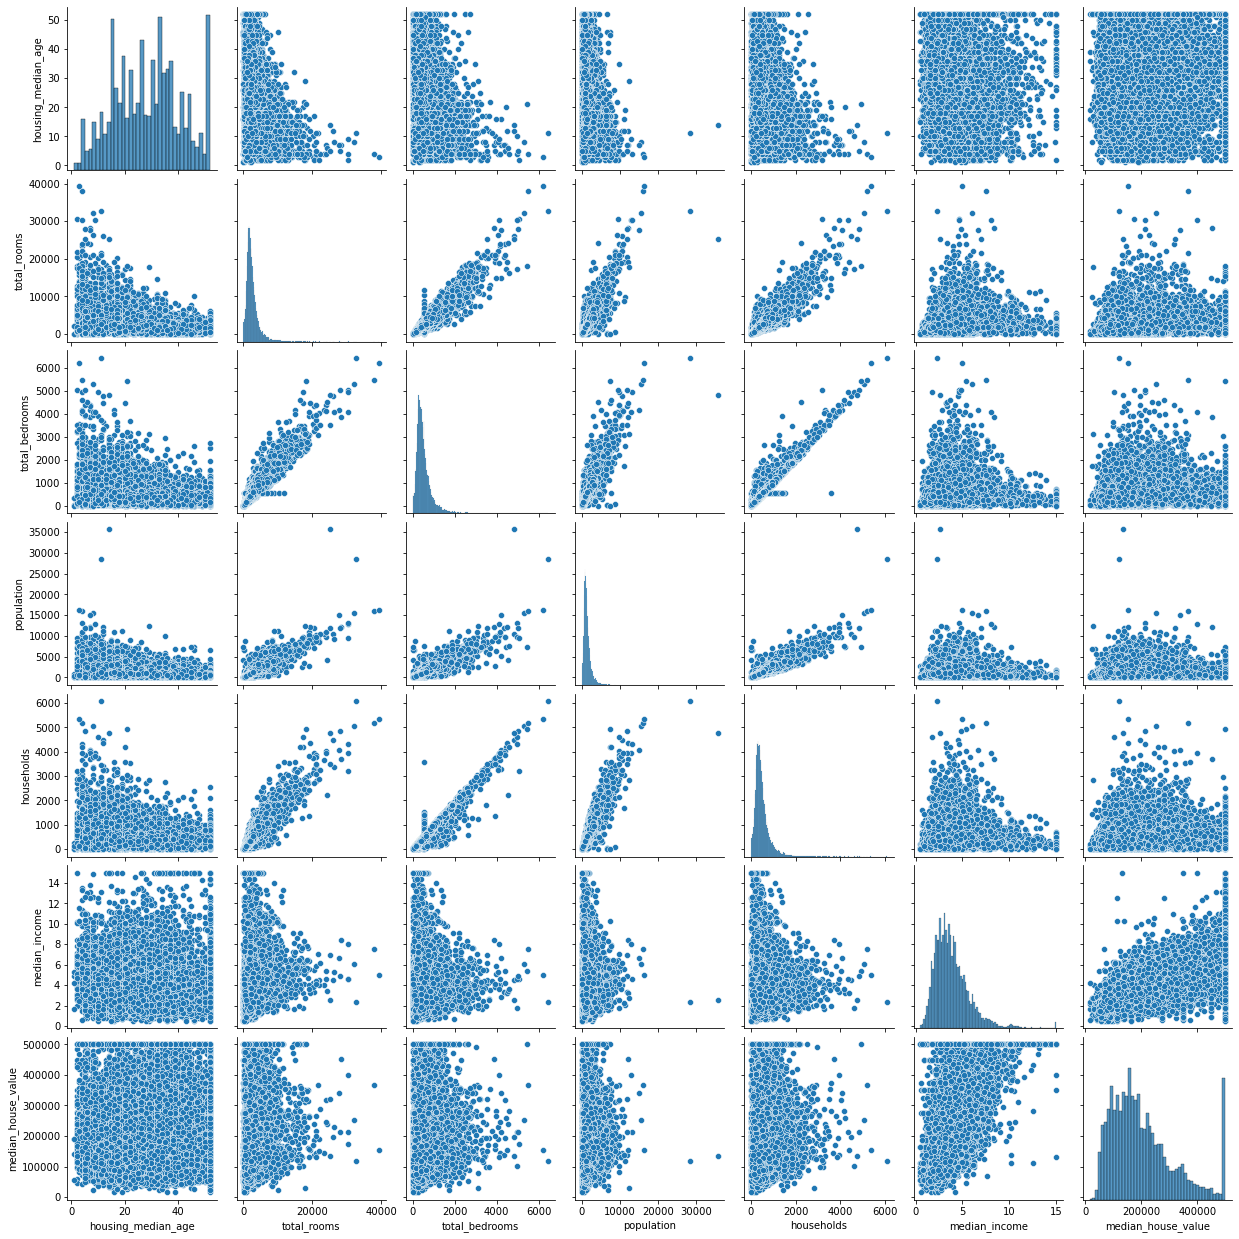

In [70]:
sns.pairplot(df)

In [71]:
df.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

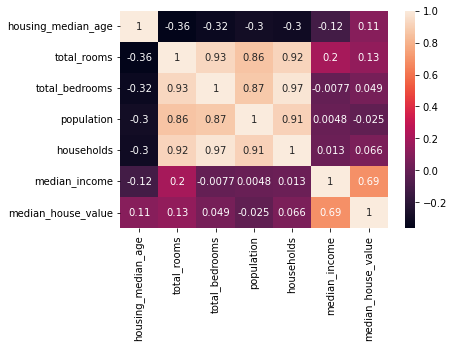

In [72]:
sns.heatmap(df.corr(), annot = True )

In [73]:
df.columns
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [74]:
df['ocean_proximity'].replace('NEAR BAY', 1, inplace = True)
df['ocean_proximity'].replace('<1H OCEAN', 2, inplace = True)
df['ocean_proximity'].replace('INLAND', 3, inplace = True)
df['ocean_proximity'].replace('NEAR OCEAN', 4, inplace = True)
df['ocean_proximity'].replace('ISLAND', 5, inplace = True)
x = df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity']]
y = df['median_house_value']

In [75]:
x.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41,880,129.0,322,126,8.3252,1
1,21,7099,1106.0,2401,1138,8.3014,1
2,52,1467,190.0,496,177,7.2574,1
3,52,1274,235.0,558,219,5.6431,1
4,52,1627,280.0,565,259,3.8462,1


In [76]:
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [78]:
x_test.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2630,32,1218,331.0,620,268,1.6528,4
4589,52,1261,616.0,2309,581,1.6184,2
16442,34,1500,337.0,674,282,2.5150,3
10018,9,2802,447.0,955,418,5.2359,3
8138,36,1408,250.0,702,251,4.8750,2


In [79]:
x_train

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
18084,30,3033,540.0,1440,507,6.2182,2
1796,39,2002,416.0,1166,395,1.7257,1
3960,19,2581,857.0,2004,784,2.6159,2
11225,34,1290,203.0,664,204,5.8461,2
12477,52,2151,664.0,1146,603,1.4034,3
...,...,...,...,...,...,...,...
9701,34,2486,560.0,2443,557,2.5263,2
7636,26,4586,1042.0,3680,1027,4.1740,2
13767,25,2495,438.0,1071,405,4.8173,3
13323,43,763,219.0,851,198,1.7292,3


In [80]:
y_train

18084    380800
1796      91500
3960     182300
11225    227400
12477     90300
          ...  
9701     130400
7636     205100
13767    146600
13323     79200
20483    217700
Name: median_house_value, Length: 16512, dtype: int64

In [81]:
y_test

2630      58100
4589     225000
16442    110800
10018    213300
8138     222500
          ...  
18921    201800
7232     153500
719      196900
10314    235900
9390     327200
Name: median_house_value, Length: 4128, dtype: int64

In [82]:
from sklearn.linear_model import LinearRegression


In [83]:
lm = LinearRegression()

In [84]:
lm.fit(x_train, y_train)

LinearRegression()

In [85]:
lm.coef_

array([ 1.68211756e+03, -1.70587179e+01,  6.96913332e+01, -4.37782143e+01,
        1.63606724e+02,  4.63802935e+04, -8.55465307e+03])

In [90]:
coef_table  = pd.DataFrame(lm.coef_ , index = x_train.columns, columns = ['Coefficient'])
coef_table

,Coefficient
housing_median_age,1682.117564
total_rooms,-17.058718
total_bedrooms,69.691333
population,-43.778214
households,163.606724
median_income,46380.293494
ocean_proximity,-8554.653069


In [92]:
print(lm.intercept_)


-11923.07168037913


In [93]:
pred = lm.predict(x_test)

In [94]:
pred

array([103337.84906665, 148890.0300312 , 150779.88641299, ...,
       223130.92159211, 275675.01743442, 257444.73384511])

In [97]:
pred_data = pd.DataFrame({'Original' :  y_test, 'Prediction By Model' : pred})
pred_data

,Original,Prediction By Model
2630,58100,103337.849067
4589,225000,148890.030031
16442,110800,150779.886413
10018,213300,230327.519963
8138,222500,261364.924892
...,...,...
18921,201800,257702.029641
7232,153500,134096.734399
719,196900,223130.921592
10314,235900,275675.017434


In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , mean_absolute_percentage_error

In [102]:
print("Mean absolute error is:", mean_absolute_error(y_test, pred))
print("Mean squared error is:", mean_squared_error(y_test, pred))
print("Mean absolute error is:", mean_absolute_percentage_error(y_test, pred))

Mean absolute error is: 56987.194104316215
Mean squared error is: 6140983836.372965
Mean absolute error is: 0.34098425915166225
